# Instructions

In this part of the project you develop models to forecast the next 5 years of U.S. birth rates, in births per 1,000, from 1960-2020.  The data are annual and come from the World Bank via [FRED](https://fred.stlouisfed.org/series/SPDYNCBRTINUSA).  For each of the methods you use you should:

1. Fully justify the final model choice for each method
2. Demonstrate whether the selected model fully incorporates all the available information in the time series




In [ ]:
install.packages('fpp2')
library(fpp2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ ggplot2   3.4.2     ✔ fma       2.5  
✔ forecast  8.21      ✔ expsmooth 2.3  





In [ ]:
#Code for widening time series plots:
library(repr)
options(repr.plot.width=10, repr.plot.height=5)

In [ ]:
birthrates <- read.csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=SPDYNCBRTINUSA&scale=left&cosd=1960-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-01-01&line_index=1&transformation=lin&vintage_date=2023-04-21&revision_date=2023-04-21&nd=1960-01-01')
birthrate_ts <- ts(birthrates[,2], start = 1960)

# 1) 

Fully describe this time series.

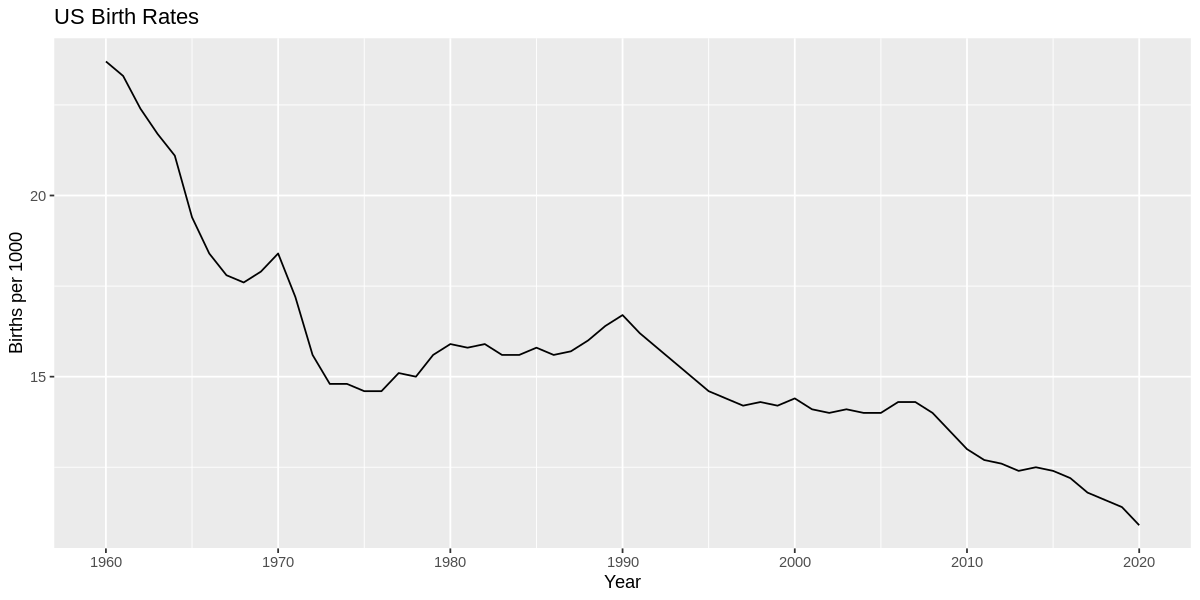

In [ ]:
autoplot(birthrate_ts) + xlab('Year') + ylab('Births per 1000') + ggtitle('US Birth Rates')

***This birth rate time series has been generally decreasing over the last 60 years. There was a steady decrease for most of the 1960's with a small spike around 1970. Then, there was a steep decrease in the early 1970's, followed by a small increase and constant birth rates until about 1987. There was another small spike around 1990, followed by a steady decrease untilabout 1996, where it started to level out until about 2008. Ever since then, the birth rates have been steadily decreasing.***

# 2) Linear regression

Select a forecast method using linear regression methods.  Fully demonstrate/explain your model selection process.

In [ ]:
birthrate_linear <- tslm(birthrate_ts~trend)
birthrate_2nd_poly <- tslm(birthrate_ts~poly(trend,2))
birthrate_3rd_poly <- tslm(birthrate_ts~poly(trend,3))
birthrate_4th_poly <- tslm(birthrate_ts~poly(trend,4))
birthrate_spline <- splinef(birthrate_ts)

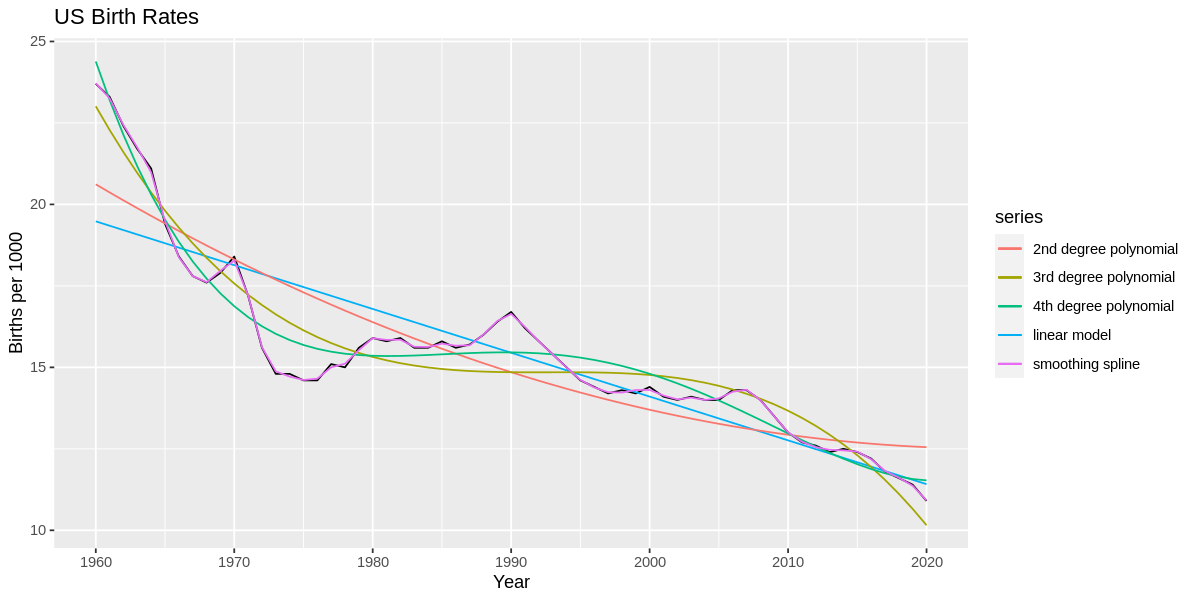

In [ ]:
autoplot(birthrate_ts) +
  autolayer(fitted(birthrate_linear), series = 'linear model') + 
  autolayer(fitted(birthrate_2nd_poly), series = '2nd degree polynomial') + 
  autolayer(fitted(birthrate_3rd_poly), series = '3rd degree polynomial') + 
  autolayer(fitted(birthrate_4th_poly), series = '4th degree polynomial') + 
  autolayer(fitted(birthrate_spline), series = 'smoothing spline') + 
  xlab('Year')+
  ylab('Births per 1000') +
  ggtitle('US Birth Rates')


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals from Linear regression model
LM test = 48.429, df = 10, p-value = 5.182e-07


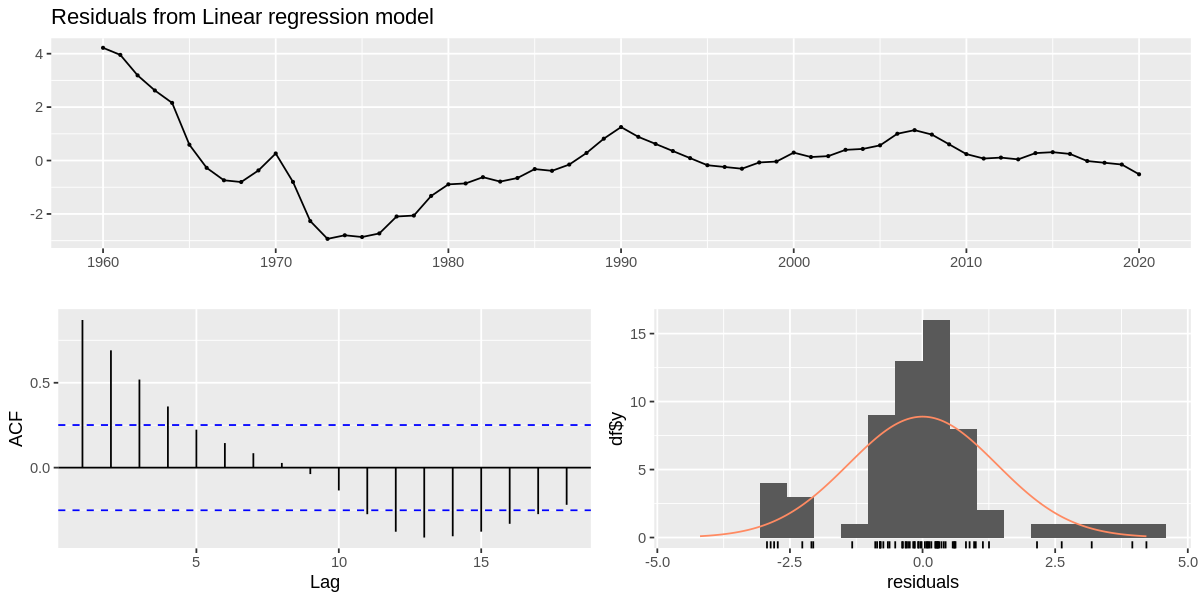

In [ ]:
checkresiduals(birthrate_linear)


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals from Linear regression model
LM test = 51.069, df = 10, p-value = 1.696e-07


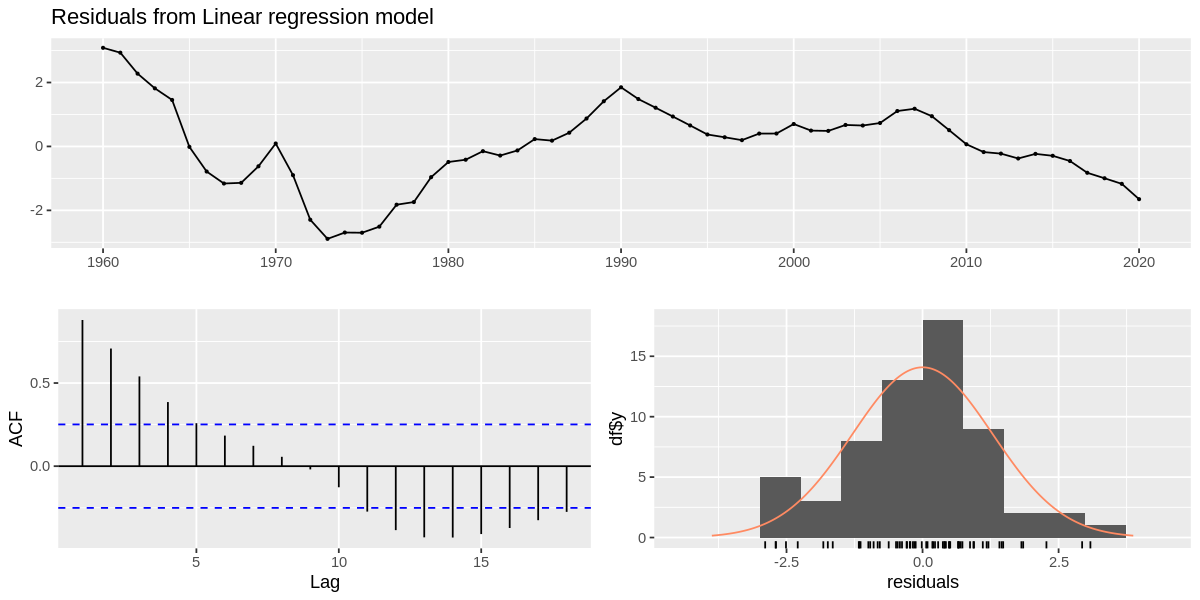

In [ ]:
checkresiduals(birthrate_2nd_poly)


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals from Linear regression model
LM test = 51.381, df = 10, p-value = 1.485e-07


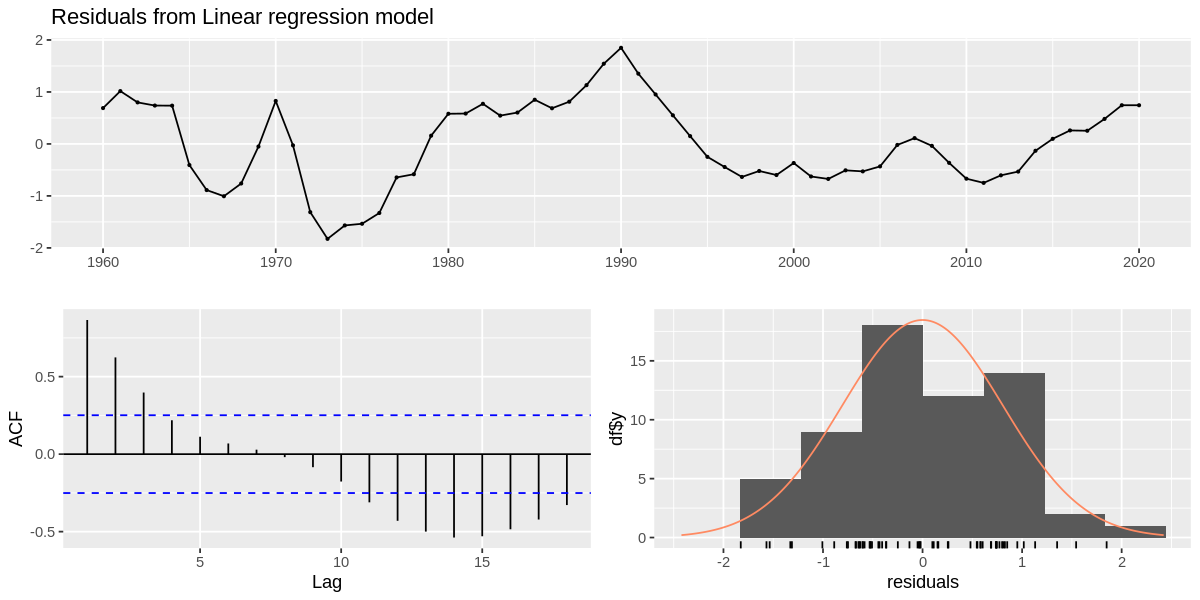

In [ ]:
checkresiduals(birthrate_3rd_poly)


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals from Linear regression model
LM test = 43.068, df = 10, p-value = 4.836e-06


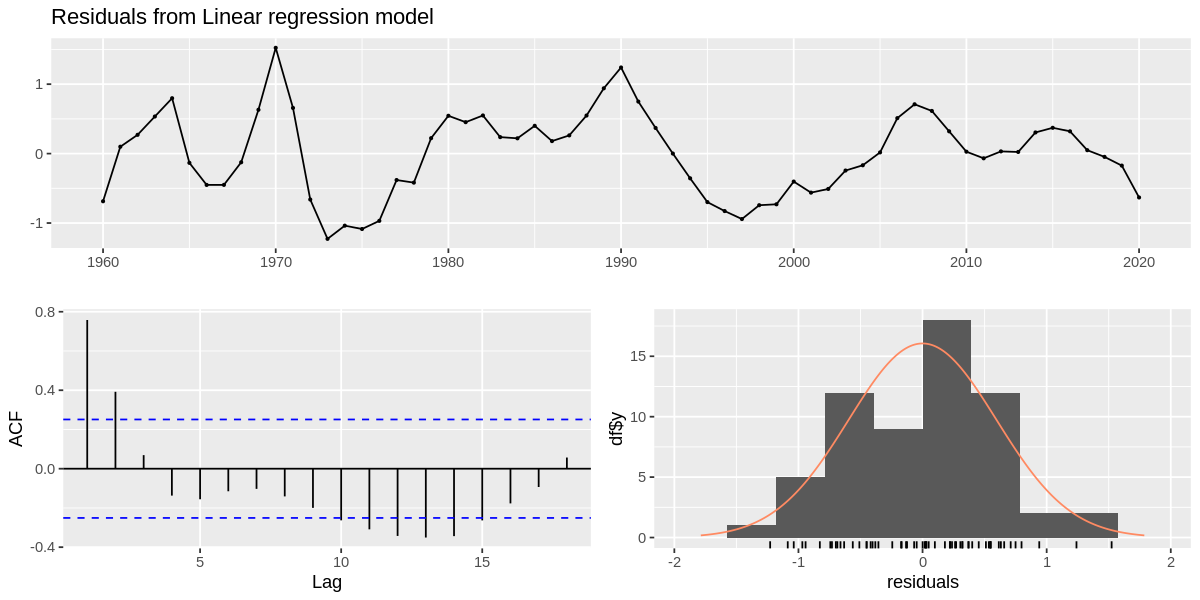

In [ ]:
checkresiduals(birthrate_4th_poly)


	Ljung-Box test

data:  Residuals from Cubic Smoothing Spline
Q* = 13.597, df = 10, p-value = 0.1922

Model df: 0.   Total lags used: 10



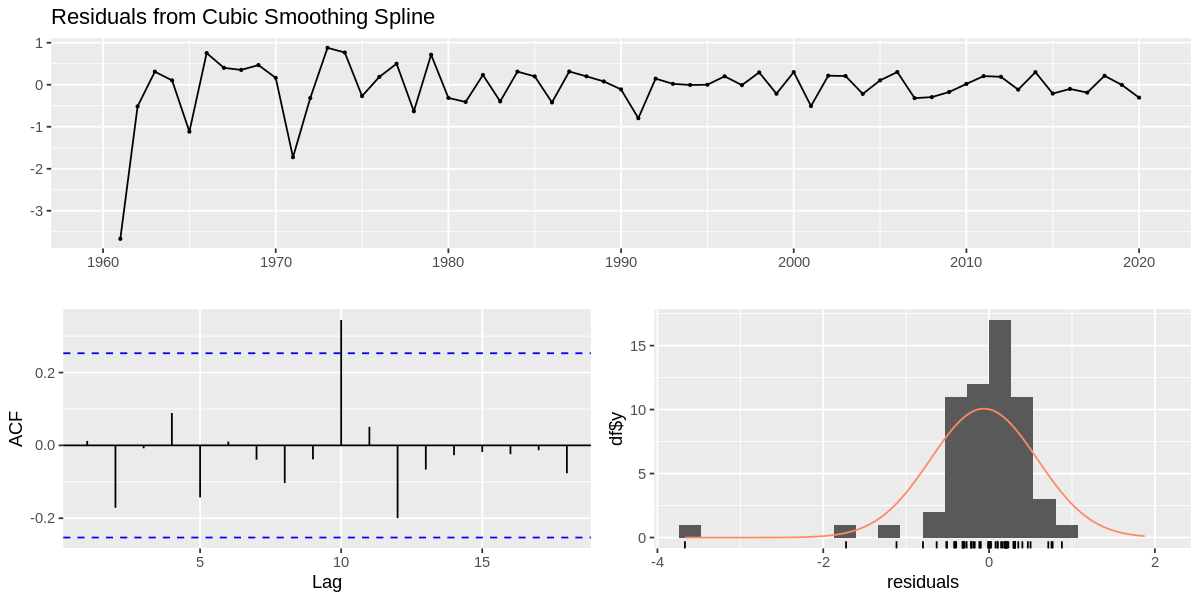

In [ ]:
checkresiduals(birthrate_spline)

***The smoothing spline model is by far the best. It is virtually identical to the original time series. We looked at a linear fit, 2nd degree polynomial, 3rd degree polynomial, 4th degree polynomial, and a smoothing spline fit. We could have fit more models with increasing degrees of polynomials, which would get increasingly better, but ultimately, nothing would beat the smoothing spline model. Looking at the ACF plots, the smoothing spline one is clearly the best, it only has one significant spike, and that is at a random lag (10). It is also the only model without a significant p-value.***

# 3) Exponential smoothing

Select an exponential smoothing forecast method.  Fully demonstrate/explain your model selection process and clearly state the final model chosen.  Also, interpret the model smoothing parameters and initial states to the best of your ability.  Is your final model any of the "named" exponential smoothing methods?

In [ ]:
birthrate_ses <- ses(birthrate_ts, h =5)
summary(birthrate_ses)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = birthrate_ts, h = 5) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 23.6993 

  sigma:  0.5026

     AIC     AICc      BIC 
170.7906 171.2116 177.1232 

Error measures:
                     ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.2098449 0.4942595 0.3541325 -1.316301 2.227067 0.9837013
                  ACF1
Training set 0.5375267

Forecasts:
     Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
2021       10.90005 10.255985 11.54412 9.915037 11.88506
2022       10.90005  9.989249 11.81085 9.507101 12.29300
2023       10.90005  9.784570 12.01553 9.194071 12.60603
2024       10.90005  9.612016 12.18808 8.930172 12.86993
2025       10.90005  9.459991 12.34011 8.697670 13.10243

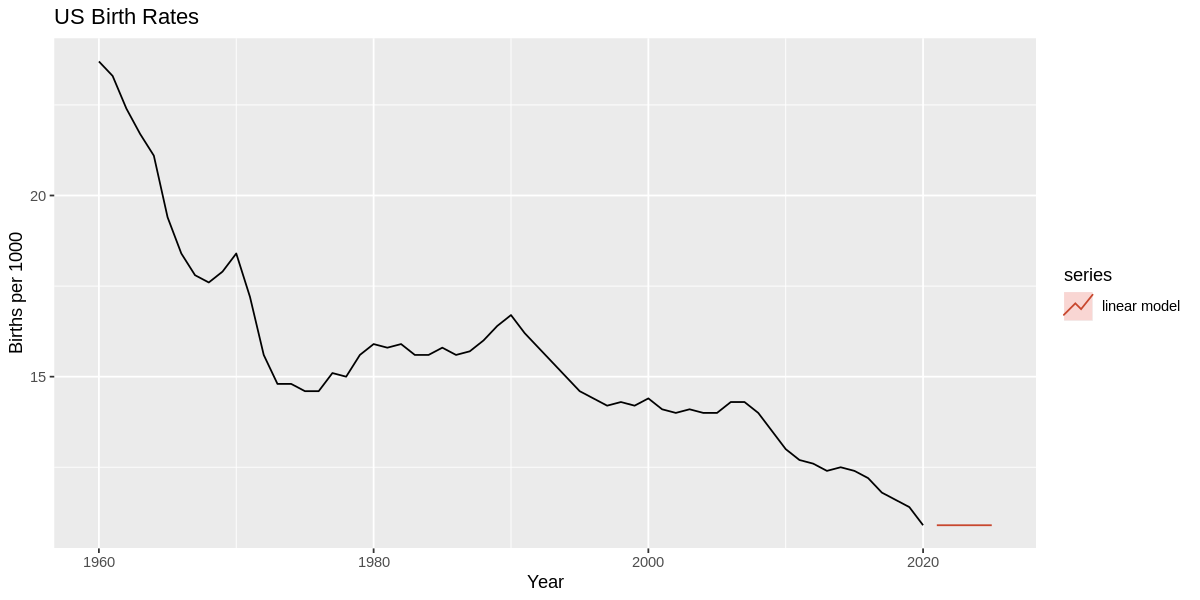

In [ ]:
autoplot(birthrate_ts) +
  autolayer(birthrate_ses, series = 'linear model', PI = FALSE) + 
  xlab('Year')+
  ylab('Births per 1000') +
  ggtitle('US Birth Rates')

***We used the `ses()` function on this time series to get the $\alpha$ of 0.9999 and the initial state of 23.6993. The $\alpha$ of 0.9999 is essentially the same as the naive method. It's saying there is no trend to pick up on, so the most recent observation is the best estimate. The initial state of 23.6993 means that in 1960, the US birth rate per 1000 people was 23.6993.***

# 4)  ARIMA

Select an ARIMA model.   Fully demonstrate/explain your model selection process and clearly state the final model chosen.

In [ ]:
ndiffs(birthrate_ts)

[1] 1

***This suggests 1 level of differencing.***

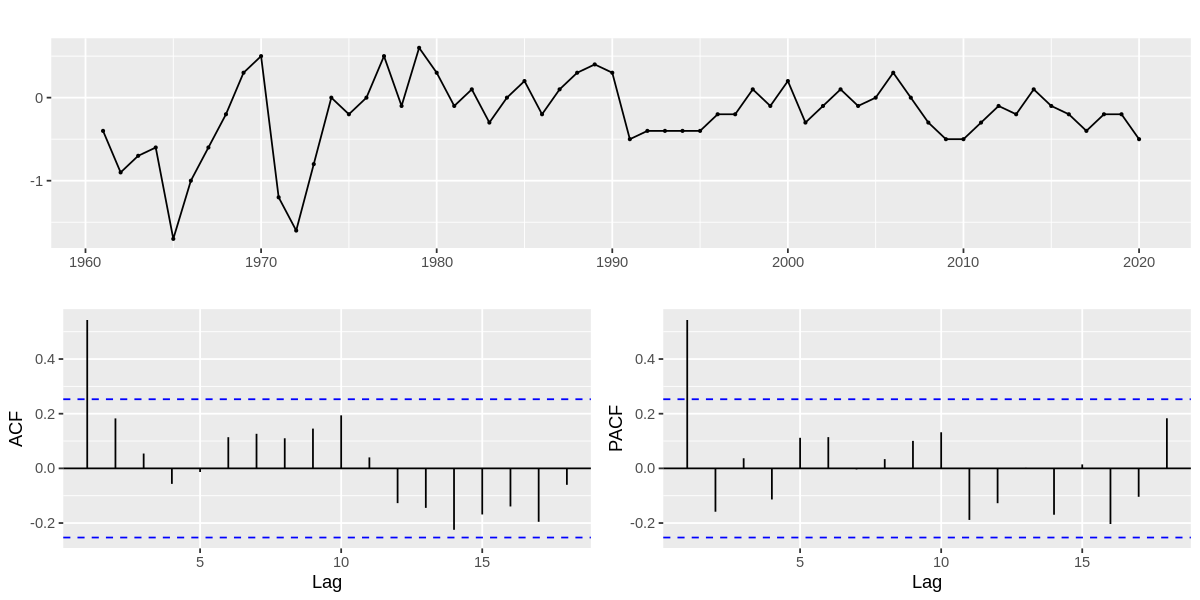

In [ ]:
birthrate_diff <- diff(birthrate_ts)
ggtsdisplay(birthrate_diff)

***In both plots, we have significant spikes at lag 1, so we can plug 1 in for p and q after setting the other p and q to 0. Our baseline models would be ARIMA(0,1,1) and ARIMA(1,1,0).***

In [ ]:
#Variations on ARIMA(0,1,1)
mod1 <- Arima(birthrate_ts, order = c(0,1,1))
mod2 <- Arima(birthrate_ts, order = c(1,1,1))
mod3 <- Arima(birthrate_ts, order = c(0,1,0))
mod4 <- Arima(birthrate_ts, order = c(1,1,0))
mod5 <- Arima(birthrate_ts, order = c(0,1,2))
#mod6 <- Arima(birthrate_ts, order = c(1,1,2))

#Variations on ARIMA(1,1,0)
mod7 <- Arima(birthrate_ts, order = c(2,1,0))
mod8 <- Arima(birthrate_ts, order = c(2,1,1))
mod9 <- Arima(birthrate_ts, order = c(0,1,0))

In [ ]:
mod1$aicc
mod2$aicc
mod3$aicc
mod4$aicc
mod5$aicc
#mod6$aicc
mod7$aicc
mod8$aicc
mod9$aicc

[1] 65.17073

[1] 62.90532

[1] 88.76259

[1] 61.63358

[1] 64.60332

[1] 63.2036

[1] 64.91145

[1] 88.76259

***Model 4 is the best model with an AICc of 61.63. This is ARIMA(1,1,0). Now we should check to see if including a drift helps.***

In [ ]:
mod4_with_trend <- Arima(birthrate_ts, order = c(1,1,0), include.drift = TRUE)
mod4_with_trend

Series: birthrate_ts 
ARIMA(1,1,0) with drift 

Coefficients:
         ar1    drift
      0.5393  -0.2222
s.e.  0.1071   0.1038

sigma^2 = 0.1474:  log likelihood = -26.85
AIC=59.7   AICc=60.13   BIC=65.98

***We get a slightly lower AICc of 60.13 if we include a drift. This is now our best model. Now we should compare this to `auto.arima()`.***

In [ ]:
birthrate_auto <- auto.arima(birthrate_ts)
summary(birthrate_auto)

Series: birthrate_ts 
ARIMA(0,1,1) with drift 

Coefficients:
         ma1    drift
      0.5659  -0.2157
s.e.  0.0944   0.0757

sigma^2 = 0.1468:  log likelihood = -26.75
AIC=59.5   AICc=59.93   BIC=65.79

Training set error measures:
                       ME      RMSE       MAE        MPE    MAPE     MASE
Training set 0.0006594053 0.3736178 0.2702743 0.06707959 1.71352 0.750762
                   ACF1
Training set 0.09651256

***Auto ARIMA gets an even lower AICc of 59.93. This model is ARIMA(0,1,1) with drift.***

In [ ]:
auto_arima_with_trend <- Arima(birthrate_ts, order = c(0,1,1), include.drift = TRUE)
auto_arima_with_trend

Series: birthrate_ts 
ARIMA(0,1,1) with drift 

Coefficients:
         ma1    drift
      0.5659  -0.2157
s.e.  0.0944   0.0757

sigma^2 = 0.1468:  log likelihood = -26.75
AIC=59.5   AICc=59.93   BIC=65.79

# 5) 

You now have 3 models: linear regression; exponential smoothing; and ARIMA models.  Create 3 forecasts (one from each model) to forecast the birth rates for the next 5 years.  Comment on which methods (if any) seem reasonable.

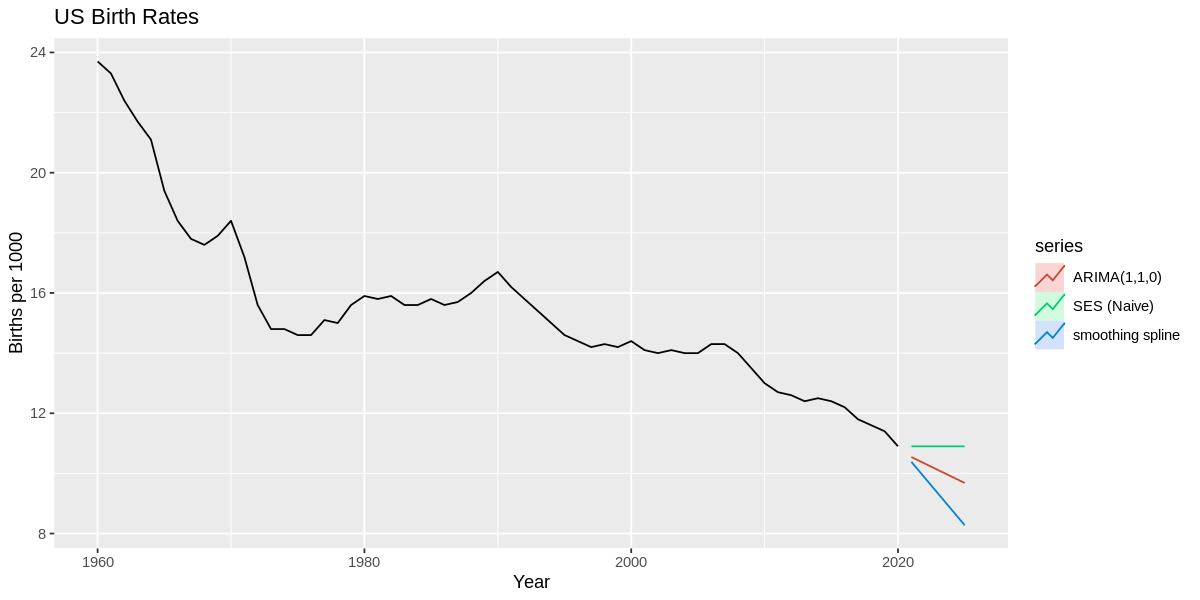

In [ ]:
birthrate_spline_forecast <- forecast(birthrate_spline, h = 5)
birthrate_ses_forecast <- forecast(birthrate_ses, h = 5)
auto_arima_w_trend_forecast <- forecast(auto_arima_with_trend, h = 5)

autoplot(birthrate_ts) +
  autolayer(birthrate_spline_forecast, series = 'smoothing spline', PI = FALSE) + 
  autolayer(birthrate_ses_forecast, series = 'SES (Naive)', PI = FALSE) + 
  autolayer(auto_arima_w_trend_forecast, series = 'ARIMA(1,1,0)', PI = FALSE) +
  xlab('Year')+
  ylab('Births per 1000') +
  ggtitle('US Birth Rates')

***The auto ARIMA model seems to be the most reasonable. The SES method seems to be the most wrong since it's not accounting for the clear downward trend in the time series. The smoothing spline forecast seems to be a little too steep.***

# 6) 

Which of your 4 models most accurately forecasts a test set consisting of the most recent 5 years of birth rates?

In [ ]:
length(birthrate_ts)

[1] 61

In [ ]:
birthrate_train <- window(birthrate_ts, end = c(2015))
length(birthrate_train)

[1] 56

In [ ]:
birthrate_test <- window(birthrate_ts, start = c(2016))
length(birthrate_test)

[1] 5

In [ ]:
spline_train <- splinef(birthrate_train)
ses_train <- ses(birthrate_train, h =5)
arima_train <- Arima(birthrate_train, order = c(0,1,1), include.drift = TRUE)

spline_forecast_train <- forecast(spline_train, h=5)
ses_forecast_train <- forecast(ses_train, h=5)
arima_forecast_train <- forecast(arima_train, h=5)

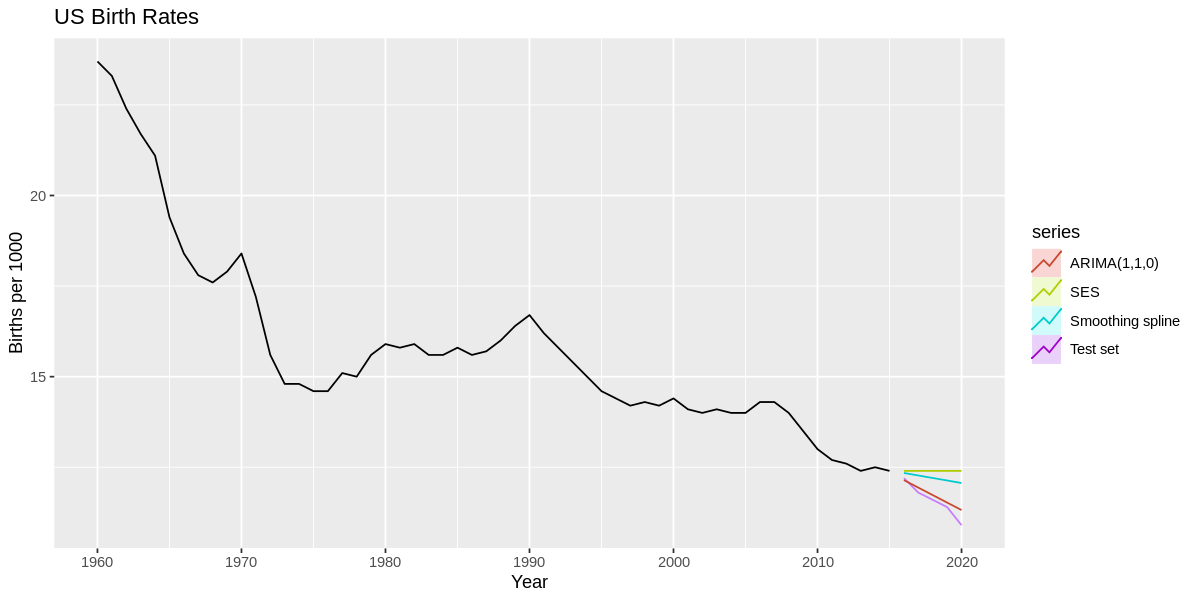

In [ ]:
autoplot(birthrate_train) +
  autolayer(birthrate_test, series = 'Test set') +
  autolayer(spline_forecast_train, series = 'Smoothing spline', PI = FALSE) +
  autolayer(ses_forecast_train, series = 'SES', PI = FALSE) +
  autolayer(arima_forecast_train, series = 'ARIMA(1,1,0)', PI = FALSE) +
  xlab('Year')+
  ylab('Births per 1000') +
  ggtitle('US Birth Rates')

***It looks like the ARIMA model is cleary the best. We should check the accuracy metrics just to be sure.***

In [ ]:
model_accuracy <- rbind(accuracy(spline_forecast_train, birthrate_test) [2,c(2,3,5,6)],
accuracy(ses_forecast_train, birthrate_test) [2,c(2,3,5,6)],
accuracy(arima_forecast_train, birthrate_test) [2,c(2,3,5,6)])
methods <- c('spline','SES','ARIMA')
cbind(methods, round(model_accuracy,4))

methods,RMSE,MAE,MAPE,MASE
spline,0.7074,0.6233,5.4982,1.7054
SES,0.9263,0.82,7.2309,2.2438
ARIMA,0.2144,0.1736,1.5379,0.475


***ARIMA(0,1,1) with drift is the best model by far. It has the lowest values for all relevant accuracy metrics.***